<a href="https://colab.research.google.com/github/Dmitry1937/RL/blob/main/Q_Learning_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env = gym.make('Taxi-v3',)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 500
Actions: 6


In [ ]:
lr = 1 # Так как задача давольна простая необходимости уменьшать LR нет.
gamma = 1 # Данная задача уже на уровне игры имеет штраф за ход. Необходимость в gamma нет.

NUM_EPISODES = 2000 # число эпизодов для обучения
MAX_STEPS = 20 # Из описания понятно что 20 ходов это будет 100% достаточно

In [ ]:
pathLenListMean = [] # среднии длины траекторий по 100 эпизодам
totalRewardListMean = [] # среднии суммарные награды по 100 эпизодам

# Инициализация Q-функции (таблицы)
Q = np.zeros((NUM_STATES, NUM_ACTIONS)) #условия задачи допускают инициализацию 0-ми т.к. за каждое действия мы 100% получаем какую-либо награду

In [ ]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам
for i in range(NUM_EPISODES):
    
    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
            
        # Выбор действия по текущей политике
        a = np.argmax(Q[s,:])
        
        # Сделать шаг
        s1, r, done, _ = env.step(a)
        
        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        # Обновление Q-функции
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        # Если конец эпизода
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    if i%100 == 0: 
      print('Episode {}: Total reward = {}'.format(i, totalReward))  
      pathLenListMean.append(np.mean(pathLenList))
      totalRewardListMean.append(np.mean(totalRewardList))
      pathLenList = [] 
      totalRewardList = [] 
    elif i==1985:
      print('--------')
      print('Episode {}: Total reward = {}'.format(i, totalReward))   
    elif i>1985:
      print('Episode {}: Total reward = {}'.format(i, totalReward))   

Episode 0: Total reward = -38
Episode 100: Total reward = -74
Episode 200: Total reward = -20
Episode 300: Total reward = -56
Episode 400: Total reward = -20
Episode 500: Total reward = -20
Episode 600: Total reward = -20
Episode 700: Total reward = -20
Episode 800: Total reward = -20
Episode 900: Total reward = 11
Episode 1000: Total reward = 10
Episode 1100: Total reward = 7
Episode 1200: Total reward = 1
Episode 1300: Total reward = 13
Episode 1400: Total reward = 4
Episode 1500: Total reward = 12
Episode 1600: Total reward = 6
Episode 1700: Total reward = 7
Episode 1800: Total reward = 5
Episode 1900: Total reward = 10
--------
Episode 1985: Total reward = 13
Episode 1986: Total reward = 10
Episode 1987: Total reward = 7
Episode 1988: Total reward = 7
Episode 1989: Total reward = 8
Episode 1990: Total reward = 9
Episode 1991: Total reward = 5
Episode 1992: Total reward = 3
Episode 1993: Total reward = 8
Episode 1994: Total reward = 4
Episode 1995: Total reward = 6
Episode 1996: Tot

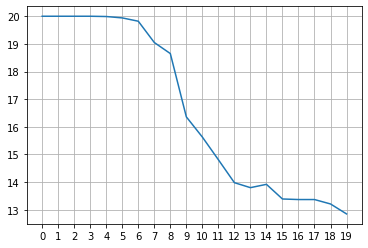

In [ ]:
plt.plot(pathLenListMean,  )
plt.xticks(range(0,20))
plt.grid( )

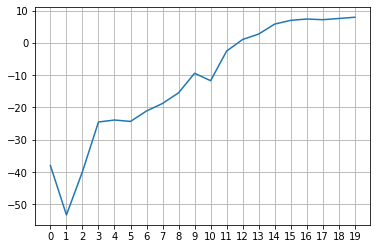

In [ ]:
plt.plot(totalRewardListMean)
plt.xticks(range(0,20))
plt.grid()

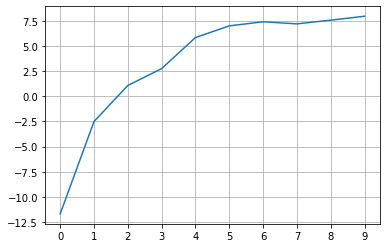

In [ ]:
plt.plot(totalRewardListMean[10:])
plt.xticks(range(0,10))
plt.grid()

По графика видно что с 1100 итерации в среднем за 100 эпиздов мы начинаем получать уже положительные награды

In [ ]:
totalReward = 0
s = env.reset()

for _ in range(20):
    env.render()
    a = np.argmax(Q[s,:]) # выбираем оптимальное действие
    s, r, done, _ = env.step(a)
    totalReward += r
    if done:
        env.render()        
        break

env.close()
print('Total reward = {}'.format(totalReward))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |